<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')
#go through authentication step

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data and take a look at it
#You'll have to change this file path to get this line to work
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# kNN Implementation

In [ ]:
def knn(specimen, data, k):
  data['distance_to_new'] = numpy.sqrt(
    (specimen['petal length']-data['petal length'])**2
    +(specimen['sepal length']-data['sepal length'])**2
    +(specimen['petal width']-data['petal width'])**2
    +(specimen['sepal width']-data['sepal width'])**2)
  
  sorted_data = data.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:5]['species'].mode()[0]

In [ ]:
#### dictionary of values
iris = {}
iris['petal length'] = 5.1
iris['sepal length'] = 7.2
iris['petal width'] = 1.5
iris['sepal width'] = 2.5
# 5-NN 
knn(iris,data,5)

'Iris-versicolor'

# Normalization Code

In [ ]:
titanic = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#convert sex to numeric
titanic['sex'] = titanic['sex'].replace(to_replace='female', value=1)
titanic['sex'] = titanic['sex'].replace(to_replace='male', value=0)

In [ ]:
#gender
#calculate mean and std
s_mean = titanic['sex'].mean()
s_std = titanic['sex'].std()

#replace column with each entry's z-score
titanic['sex'] = (titanic["sex"] - s_mean)/s_std

In [ ]:
#age
#calculate mean and std
a_mean = titanic['age'].mean()
a_std = titanic['age'].std()

#replace column with each entry's z-score
titanic['age'] = (titanic["age"] - a_mean)/a_std

# Exercise 
Normalize the predictor columns of the iris dataset
- Note: you need a way to transform the new reading (the specimen) that you will make the prediction on so that the new one and the training data will all be on the same scale. How can you do that?

Repeat your k-NN prediction code with the normalized data.
- Does the value of k change the predictions?
Compare using k=3, k=5 on each method (normalized and non-normalized).


In [ ]:
# Write your code here!

# Graphs!

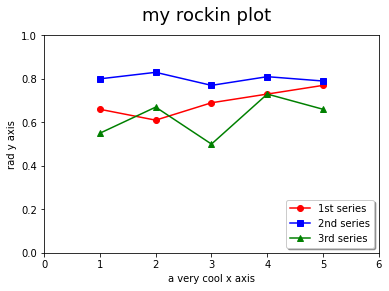

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1])
plt.show()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


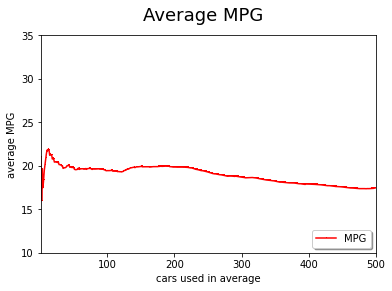

In [ ]:
#another example of a plot
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/vehicles.csv')
pandas.set_option('display.max_columns', 100)
gas_vehicles = data[data["fuelType"] == "Regular"]

# a silly function that returns the average MPG for the first k cars in the dataframe
def getAverageMPG(data,k):
    return data["comb08"].iloc[0:k].mean()

number_of_points = 500

# populate the series list
series = []
for i in range(1,number_of_points):
    val = getAverageMPG(gas_vehicles,i)
    series.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Average MPG',fontsize=18)
plt.xlabel('cars used in average')
plt.ylabel('average MPG')
plt.plot(xvals,series,'r,-',label='MPG')
plt.legend(loc='lower right', shadow=True)

plt.axis([1, number_of_points, 10, 35])
plt.show()